/tmp/ipykernel_73056/217008835.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


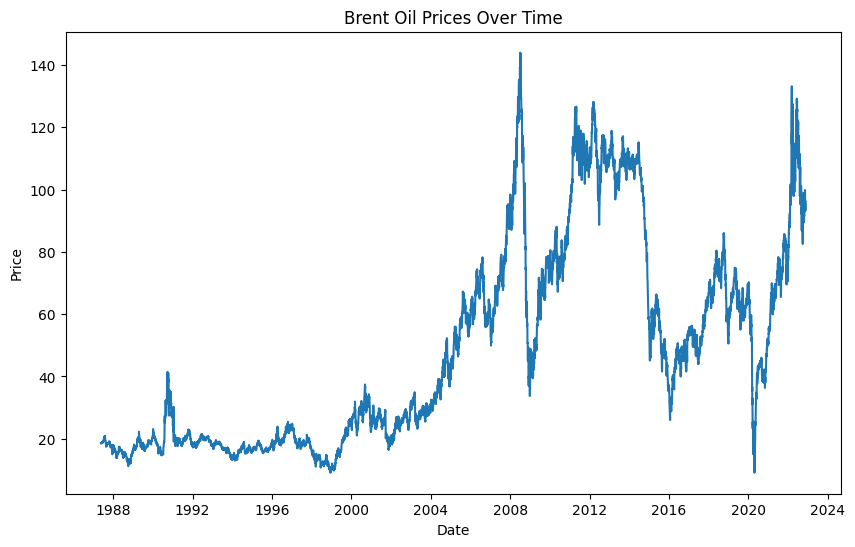

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
data = pd.read_csv('../../Inputs/data/processed_data/brent_oil_prices.csv')

# Convert DATE column to DATEtime
data['DATE'] = pd.to_DATEtime(data['DATE'])

# Set DATE column as index
data.set_index('DATE',Inplace=True)

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.show()


/tmp/ipykernel_73056/2944563280.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


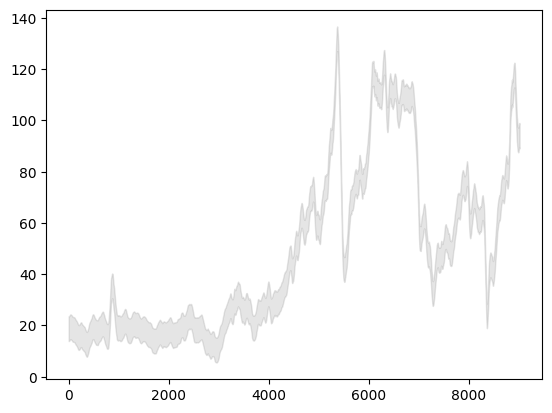

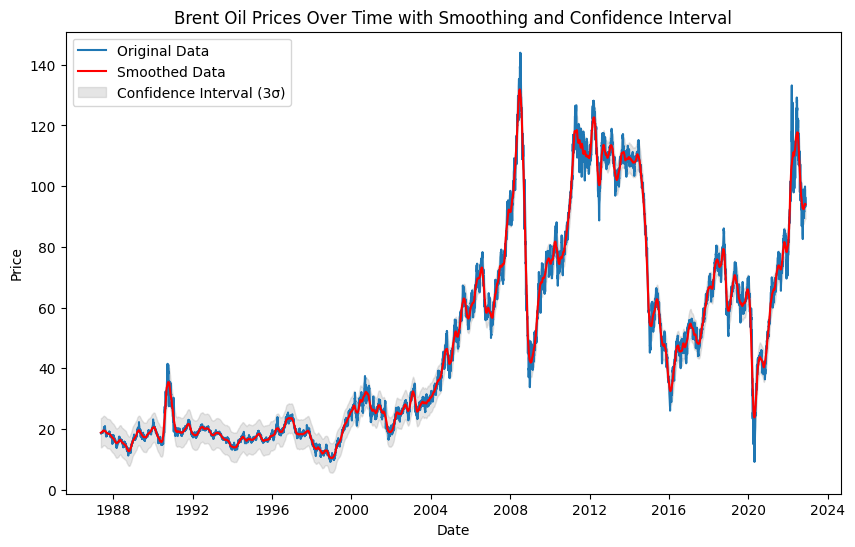

In [20]:
from tsmoothie.smoother import ConvolutionSmoother
import pandas as pd
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../../Inputs/data/processed_data/brent_oil_prices.csv')

# Convert DATE column to DATEtime
data['DATE'] = pd.to_DATEtime(data['DATE'])

# Extract Price column
Price = data['Price'].values

# Perform smoothing
smoother = ConvolutionSmoother(window_len=50, window_type='ones')
smoother.smooth(Price)

# Generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=2)
low = low.flatten()
up = up.flatten()

plt.fill_between(data.index, low, up, color='gray', alpha=0.2, label='Confidence Interval (3σ)')

# Set DATE column as index
data.set_index('DATE', inplace=True)

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Original Data')
plt.plot(data.index, smoother.smooth_data[0], label='Smoothed Data', color='red')
plt.fill_between(data.index, low, up, color='gray', alpha=0.2, label='Confidence Interval (3σ)')
plt.title('Brent Oil Prices Over Time with Smoothing and Confidence Interval')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.legend()
plt.show()


In [1]:
import pandas as pd
df=pd.read_csv("../../Inputs/data/processed_data/cleaned_gdp_data.csv")

In [6]:
df.head()

,date,GDP,Country Name
0,2022,3.544708e+09,Aruba
1,2021,3.103184e+09,Aruba
2,2020,2.558906e+09,Aruba
3,2019,3.395799e+09,Aruba
4,2018,3.276184e+09,Aruba


In [18]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

# Function to get data from FRED
def get_fred_data(ticker, start_date, end_date):
    data = web.DataReader(ticker, 'fred', start_date, end_date)
    return data

# Define the date range
start_date = '1987-05-20'
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect data
gdp = get_fred_data('GDP', start_date, end_date)
inflation = get_fred_data('CPIAUCSL', start_date, end_date)
unemployment = get_fred_data('UNRATE', start_date, end_date)
exchange_rate = get_fred_data('DEXUSEU', start_date, end_date)
gepu_data = get_fred_data('GEPUCURRENT', start_date, end_date)
emv_data = get_fred_data('EMVELECTGOVRN', start_date, end_date)
opec_data = get_fred_data('COOTHERZ315', start_date, end_date)

# Save raw data to CSV
gdp.to_csv('../../Inputs/data/raw_data/gdp.csv')
inflation.to_csv('../../Inputs/data/raw_data/inflation.csv')
unemployment.to_csv('../../Inputs/data/raw_data/unemployment.csv')
exchange_rate.to_csv('../../Inputs/data/raw_data/exchange_rate.csv')
gepu_data.to_csv('../../Inputs/data/raw_data/global_economic_policy_uncertainty.csv')
emv_data.to_csv('../../Inputs/data/raw_data/equity_market_volatility.csv')
opec_data.to_csv('../../Inputs/data/raw_data/opec_policies.csv')

# Load the data and ensure the date column is consistently named 'DATE'
brent_oil_prices = pd.read_csv('../../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])
brent_oil_prices.rename(columns={'Date': 'DATE'}, inplace=True)
brent_oil_prices.set_index('DATE', inplace=True)

gdp = pd.read_csv('../../Inputs/data/raw_data/gdp.csv', parse_dates=['DATE'])
gdp.set_index('DATE', inplace=True)

inflation = pd.read_csv('../../Inputs/data/raw_data/inflation.csv', parse_dates=['DATE'])
inflation.set_index('DATE', inplace=True)

unemployment = pd.read_csv('../../Inputs/data/raw_data/unemployment.csv', parse_dates=['DATE'])
unemployment.set_index('DATE', inplace=True)

exchange_rate = pd.read_csv('../../Inputs/data/raw_data/exchange_rate.csv', parse_dates=['DATE'])
exchange_rate.set_index('DATE', inplace=True)

gepu_data = pd.read_csv('../../Inputs/data/raw_data/global_economic_policy_uncertainty.csv', parse_dates=['DATE'])
gepu_data.set_index('DATE', inplace=True)

emv_data = pd.read_csv('../../Inputs/data/raw_data/equity_market_volatility.csv', parse_dates=['DATE'])
emv_data.set_index('DATE', inplace=True)

opec_data = pd.read_csv('../../Inputs/data/raw_data/opec_policies.csv', parse_dates=['DATE'])
opec_data.set_index('DATE', inplace=True)

# Resample the data to annual frequency if necessary
brent_oil_prices_annual = brent_oil_prices.resample('A').mean()
gdp_annual = gdp.resample('A').mean()
inflation_annual = inflation.resample('A').mean()
unemployment_annual = unemployment.resample('A').mean()
exchange_rate_annual = exchange_rate.resample('A').mean()
gepu_annual = gepu_data.resample('A').mean()
emv_annual = emv_data.resample('A').mean()
opec_annual = opec_data.resample('A').mean()

# Merge the datasets
merged_data = brent_oil_prices_annual.merge(gdp_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(inflation_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(unemployment_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(exchange_rate_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(gepu_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(emv_annual, left_index=True, right_index=True, how='inner')
merged_data = merged_data.merge(opec_annual, left_index=True, right_index=True, how='inner')

# Add an empty 'Date' column
merged_data['Date'] = ''

# Save the merged data to CSV
merged_data.to_csv('../../Inputs/data/processed_data/merged_data.csv')

print("Data merged, 'Date' column added, and saved.")

# Calculate correlations
correlations = merged_data[['Price', 'GDP', 'CPIAUCSL', 'UNRATE', 'DEXUSEU', 'GEPUCURRENT', 'EMVELECTGOVRN', 'COOTHERZ315']].corr()



print("Correlation Matrix:")
print(correlations)
print("\nMerged Data Sample:")
print(merged_data.head(10))

/tmp/ipykernel_83102/1222193936.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])


Data merged, 'Date' column added, and saved.
Correlation Matrix:
                  Price       GDP  CPIAUCSL    UNRATE   DEXUSEU  GEPUCURRENT  \
Price          1.000000 -0.895897 -0.796990  0.921938  0.964411    -0.486107   
GDP           -0.895897  1.000000  0.981808 -0.986694 -0.801135     0.471862   
CPIAUCSL      -0.796990  0.981808  1.000000 -0.952720 -0.679910     0.452699   
UNRATE         0.921938 -0.986694 -0.952720  1.000000  0.814083    -0.372895   
DEXUSEU        0.964411 -0.801135 -0.679910  0.814083  1.000000    -0.568385   
GEPUCURRENT   -0.486107  0.471862  0.452699 -0.372895 -0.568385     1.000000   
EMVELECTGOVRN -0.625971  0.484081  0.421527 -0.469713 -0.623383     0.812715   
COOTHERZ315   -0.732914  0.526021  0.401631 -0.612117 -0.762426     0.128819   

               EMVELECTGOVRN  COOTHERZ315  
Price              -0.625971    -0.732914  
GDP                 0.484081     0.526021  
CPIAUCSL            0.421527     0.401631  
UNRATE             -0.469713    -0.612

/tmp/ipykernel_83102/2427414396.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])


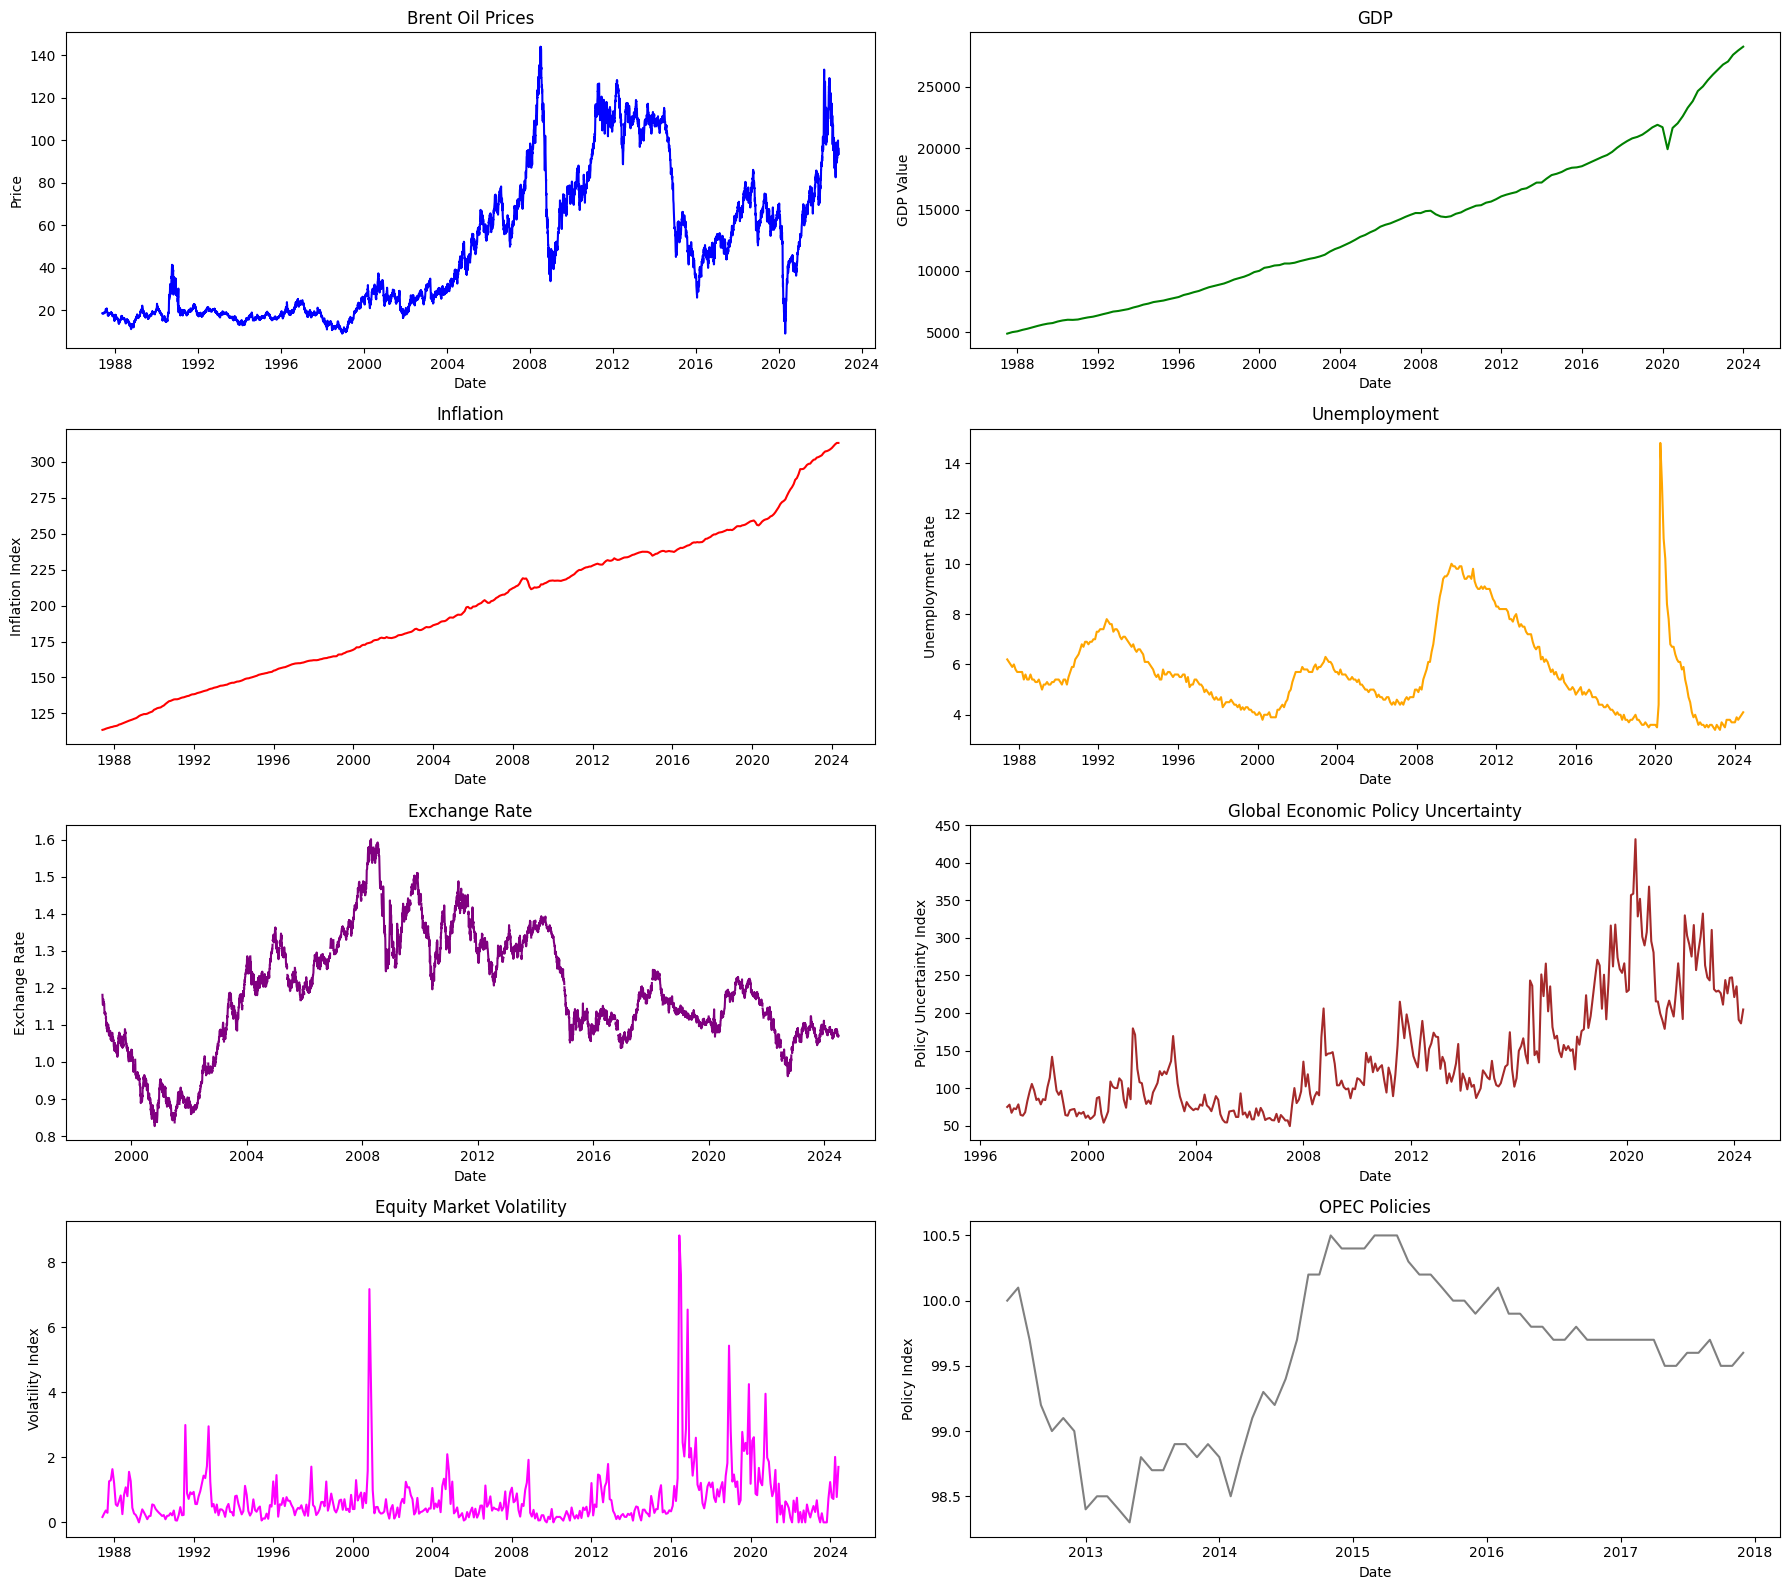

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data for each economic indicator
brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])
brent_oil_prices.set_index('Date', inplace=True)

gdp = pd.read_csv('../Inputs/data/raw_data/gdp.csv', parse_dates=['DATE'])
gdp.set_index('DATE', inplace=True)

inflation = pd.read_csv('../Inputs/data/raw_data/inflation.csv', parse_dates=['DATE'])
inflation.set_index('DATE', inplace=True)

unemployment = pd.read_csv('../Inputs/data/raw_data/unemployment.csv', parse_dates=['DATE'])
unemployment.set_index('DATE', inplace=True)

exchange_rate = pd.read_csv('../Inputs/data/raw_data/exchange_rate.csv', parse_dates=['DATE'])
exchange_rate.set_index('DATE', inplace=True)

gepu_data = pd.read_csv('../Inputs/data/raw_data/global_economic_policy_uncertainty.csv', parse_dates=['DATE'])
gepu_data.set_index('DATE', inplace=True)

emv_data = pd.read_csv('../Inputs/data/raw_data/equity_market_volatility.csv', parse_dates=['DATE'])
emv_data.set_index('DATE', inplace=True)

opec_data = pd.read_csv('../Inputs/data/raw_data/opec_policies.csv', parse_dates=['DATE'])
opec_data.set_index('DATE', inplace=True)

# Create subplots for each economic indicator
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 16))

# Plot Brent Oil Prices
axs[0, 0].plot(brent_oil_prices.index, brent_oil_prices['Price'], color='blue')
axs[0, 0].set_title('Brent Oil Prices')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')

# Plot GDP
axs[0, 1].plot(gdp.index, gdp['GDP'], color='green')
axs[0, 1].set_title('GDP')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('GDP Value')

# Plot Inflation
axs[1, 0].plot(inflation.index, inflation['CPIAUCSL'], color='red')
axs[1, 0].set_title('Inflation')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Inflation Index')

# Plot Unemployment
axs[1, 1].plot(unemployment.index, unemployment['UNRATE'], color='orange')
axs[1, 1].set_title('Unemployment')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Unemployment Rate')

# Plot Exchange Rate
axs[2, 0].plot(exchange_rate.index, exchange_rate['DEXUSEU'], color='purple')
axs[2, 0].set_title('Exchange Rate')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Exchange Rate')

# Plot Global Economic Policy Uncertainty
axs[2, 1].plot(gepu_data.index, gepu_data['GEPUCURRENT'], color='brown')
axs[2, 1].set_title('Global Economic Policy Uncertainty')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Policy Uncertainty Index')

# Plot Equity Market Volatility
axs[3, 0].plot(emv_data.index, emv_data['EMVELECTGOVRN'], color='magenta')
axs[3, 0].set_title('Equity Market Volatility')
axs[3, 0].set_xlabel('Date')
axs[3, 0].set_ylabel('Volatility Index')

# Plot OPEC Policies
axs[3, 1].plot(opec_data.index, opec_data['COOTHERZ315'], color='gray')
axs[3, 1].set_title('OPEC Policies')
axs[3, 1].set_xlabel('Date')
axs[3, 1].set_ylabel('Policy Index')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


/tmp/ipykernel_83102/3875084180.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])


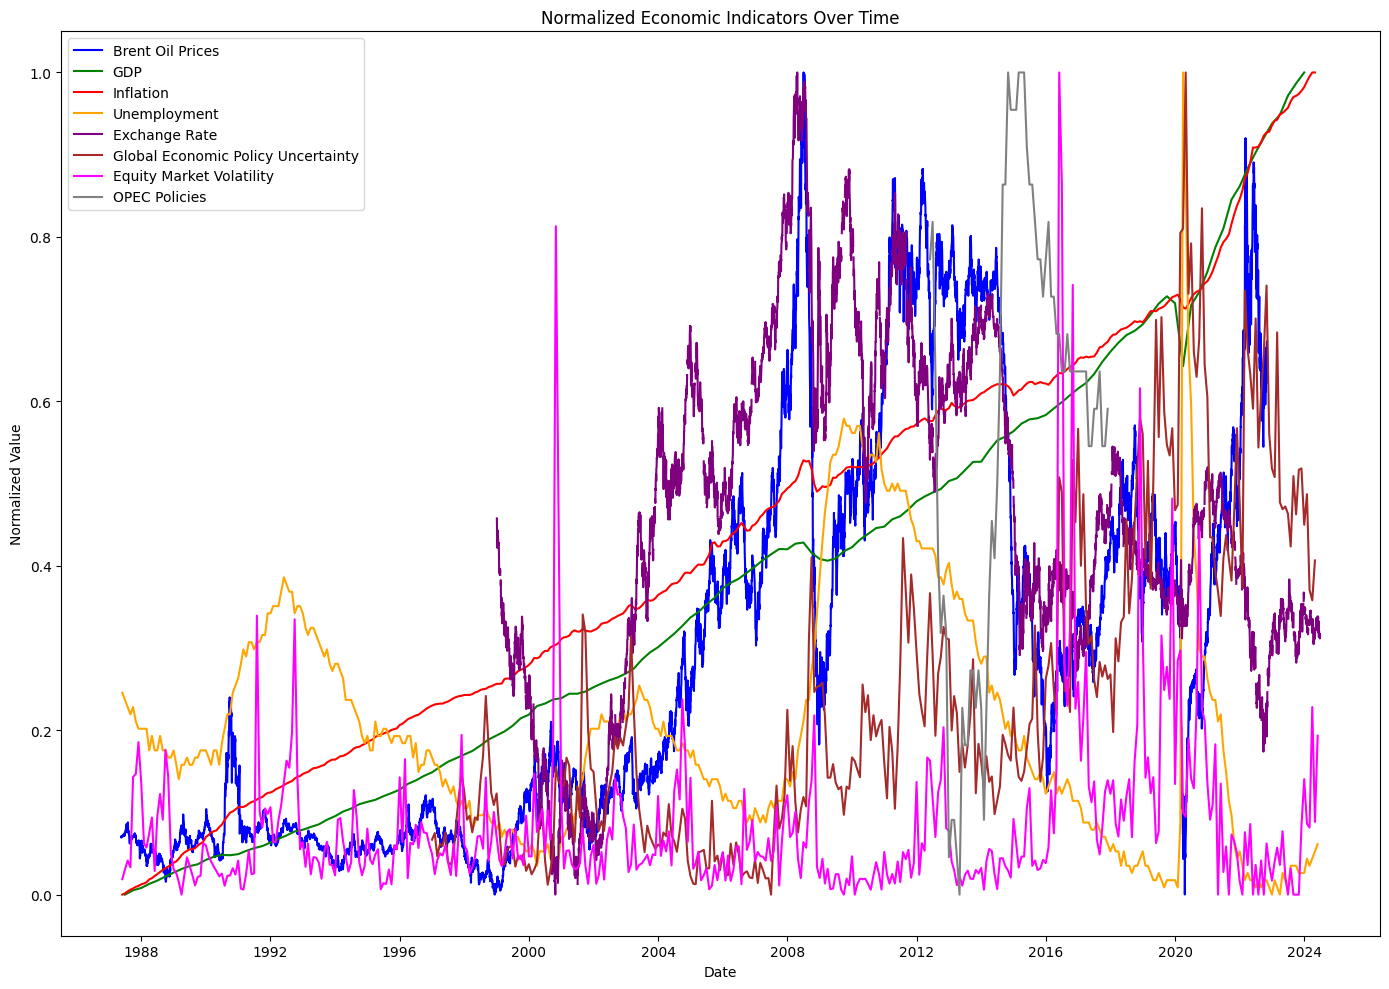

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load raw data for each economic indicator
brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])
brent_oil_prices.set_index('Date', inplace=True)

gdp = pd.read_csv('../Inputs/data/raw_data/gdp.csv', parse_dates=['DATE'])
gdp.set_index('DATE', inplace=True)

inflation = pd.read_csv('../Inputs/data/raw_data/inflation.csv', parse_dates=['DATE'])
inflation.set_index('DATE', inplace=True)

unemployment = pd.read_csv('../Inputs/data/raw_data/unemployment.csv', parse_dates=['DATE'])
unemployment.set_index('DATE', inplace=True)

exchange_rate = pd.read_csv('../Inputs/data/raw_data/exchange_rate.csv', parse_dates=['DATE'])
exchange_rate.set_index('DATE', inplace=True)

gepu_data = pd.read_csv('../Inputs/data/raw_data/global_economic_policy_uncertainty.csv', parse_dates=['DATE'])
gepu_data.set_index('DATE', inplace=True)

emv_data = pd.read_csv('../Inputs/data/raw_data/equity_market_volatility.csv', parse_dates=['DATE'])
emv_data.set_index('DATE', inplace=True)

opec_data = pd.read_csv('../Inputs/data/raw_data/opec_policies.csv', parse_dates=['DATE'])
opec_data.set_index('DATE', inplace=True)

# Normalize each dataset using Min-Max scaling
scaler = MinMaxScaler()
brent_oil_prices_scaled = scaler.fit_transform(brent_oil_prices[['Price']])
gdp_scaled = scaler.fit_transform(gdp[['GDP']])
inflation_scaled = scaler.fit_transform(inflation[['CPIAUCSL']])
unemployment_scaled = scaler.fit_transform(unemployment[['UNRATE']])
exchange_rate_scaled = scaler.fit_transform(exchange_rate[['DEXUSEU']])
gepu_scaled = scaler.fit_transform(gepu_data[['GEPUCURRENT']])
emv_scaled = scaler.fit_transform(emv_data[['EMVELECTGOVRN']])
opec_scaled = scaler.fit_transform(opec_data[['COOTHERZ315']])

# Plotting all economic indicators on one XY plane
plt.figure(figsize=(14, 10))

# Plot Brent Oil Prices
plt.plot(brent_oil_prices.index, brent_oil_prices_scaled, label='Brent Oil Prices', color='blue')

# Plot GDP
plt.plot(gdp.index, gdp_scaled, label='GDP', color='green')

# Plot Inflation
plt.plot(inflation.index, inflation_scaled, label='Inflation', color='red')

# Plot Unemployment
plt.plot(unemployment.index, unemployment_scaled, label='Unemployment', color='orange')

# Plot Exchange Rate
plt.plot(exchange_rate.index, exchange_rate_scaled, label='Exchange Rate', color='purple')

# Plot Global Economic Policy Uncertainty
plt.plot(gepu_data.index, gepu_scaled, label='Global Economic Policy Uncertainty', color='brown')

# Plot Equity Market Volatility
plt.plot(emv_data.index, emv_scaled, label='Equity Market Volatility', color='magenta')

# Plot OPEC Policies
plt.plot(opec_data.index, opec_scaled, label='OPEC Policies', color='gray')

# Add labels and legend
plt.title('Normalized Economic Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
